
> created: 2025-01-16T12:46:52 (UTC +08:00)    
> source: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data

# Crimes - 2001 to Present | City of Chicago | Data Portal

## Excerpt

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Should you have questions about this dataset, you may contact the Data Fulfillment and Analysis Division of the Chicago Police Department at [DFA@ChicagoPolice.org](mailto:DFA@ChicagoPolice.org). Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time. The Chicago Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited. The Chicago Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of Chicago or Chicago Police Department web page. The user specifically acknowledges that the Chicago Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. The unauthorized use of the words "Chicago Police Department," "Chicago Police," or any colorable imitation of these words or the unauthorized use of the Chicago Police Department logo is unlawful. This web page does not, in any way, authorize such use. Data are updated daily. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to [http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e](http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e)


## Columns (22)
| Column Name           | Description                                                                                                                                                 | API Field Name      | Data Type         |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------|-------------------|
| ID                   | Unique identifier for the record.                                                                                                                           | id                  | Number            |
| Case Number          | The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.                                                         | case_number         | Text              |
| Date                 | Date when the incident occurred. This is sometimes a best estimate.                                                                                         | date                | Floating Timestamp|
| Block                | The partially redacted address where the incident occurred, placing it on the same block as the actual address.                                              | block               | Text              |
| IUCR                 | The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description.                                                     | iucr                | Text              |
| Primary Type         | The primary description of the IUCR code.                                                                                                                   | primary_type        | Text              |
| Description          | The secondary description of the IUCR code, a subcategory of the primary description.                                                                       | description         | Text              |
| Location Description | Description of the location where the incident occurred.                                                                                                    | location_description| Text              |
| Arrest               | Indicates whether an arrest was made.                                                                                                                       | arrest              | Checkbox          |
| Domestic             | Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.                                                       | domestic            | Checkbox          |
| Beat                 | Indicates the beat where the incident occurred. A beat is the smallest police geographic area.                                                              | beat                | Text              |
| District             | Indicates the police district where the incident occurred.                                                                                                  | district            | Text              |
| Ward                 | The ward (City Council district) where the incident occurred.                                                                                               | ward                | Number            |
| Community Area       | Indicates the community area where the incident occurred. Chicago has 77 community areas.                                                                   | community_area      | Text              |
| FBI Code             | Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).                                               | fbi_code            | Text              |
| X Coordinate         | The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.                                               | x_coordinate        | Number            |
| Y Coordinate         | The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.                                               | y_coordinate        | Number            |
| Year                 | Year the incident occurred.                                                                                                                                 | year                | Number            |
| Updated On           | Date and time the record was last updated.                                                                                                                  | updated_on          | Floating Timestamp|
| Latitude             | The latitude of the location where the incident occurred.                                                                                                   | latitude            | Number            |
| Longitude            | The longitude of the location where the incident occurred.                                                                                                  | longitude           | Number            |
| Location             | The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal.                   | location            | Location          |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root = '../data/'

In [3]:
chicago = pd.read_csv(root + 'Chicago_Crimes_2012_to_2017.csv')

In [4]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [5]:
# ... existing code ...

# After chicago.info() cell, let's add checks for missing values:

# Check number of missing values per column
print("\nMissing values per column:")
print(chicago.isnull().sum())

# Calculate percentage of missing values
print("\nPercentage of missing values per column:")
print((chicago.isnull().sum() / len(chicago) * 100).round(2))

# Handle missing values appropriately:
chicago_clean = chicago.copy()

# Fill missing numeric values with appropriate methods
chicago_clean['District'] = chicago_clean['District'].fillna(chicago_clean['District'].mode()[0])
chicago_clean['Ward'] = chicago_clean['Ward'].fillna(chicago_clean['Ward'].median())
chicago_clean['Community Area'] = chicago_clean['Community Area'].fillna(chicago_clean['Community Area'].median())

# For coordinate columns, we'll drop rows where all coordinate info is missing
coordinate_cols = ['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location']
chicago_clean = chicago_clean.dropna(subset=coordinate_cols, how='all')

# Fill missing Location Description with 'UNKNOWN'
chicago_clean['Location Description'] = chicago_clean['Location Description'].fillna('UNKNOWN')

# Fill missing Case Number with 'UNKNOWN'
chicago_clean['Case Number'] = chicago_clean['Case Number'].fillna('UNKNOWN')

# Verify the cleaning
print("\nRemaining missing values after cleaning:")
print(chicago_clean.isnull().sum())

# Show basic statistics of the cleaned dataset
print("\nCleaned dataset info:")
print(chicago_clean.info())


Missing values per column:
Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

Percentage of missing values per column:
Unnamed: 0              0.00
ID                      0.00
Case Number             0.00
Date                    0.00
Block                   0.00
IUCR                    0.00
Primary Type            0.00
Description             

In [6]:
chicago_clean.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


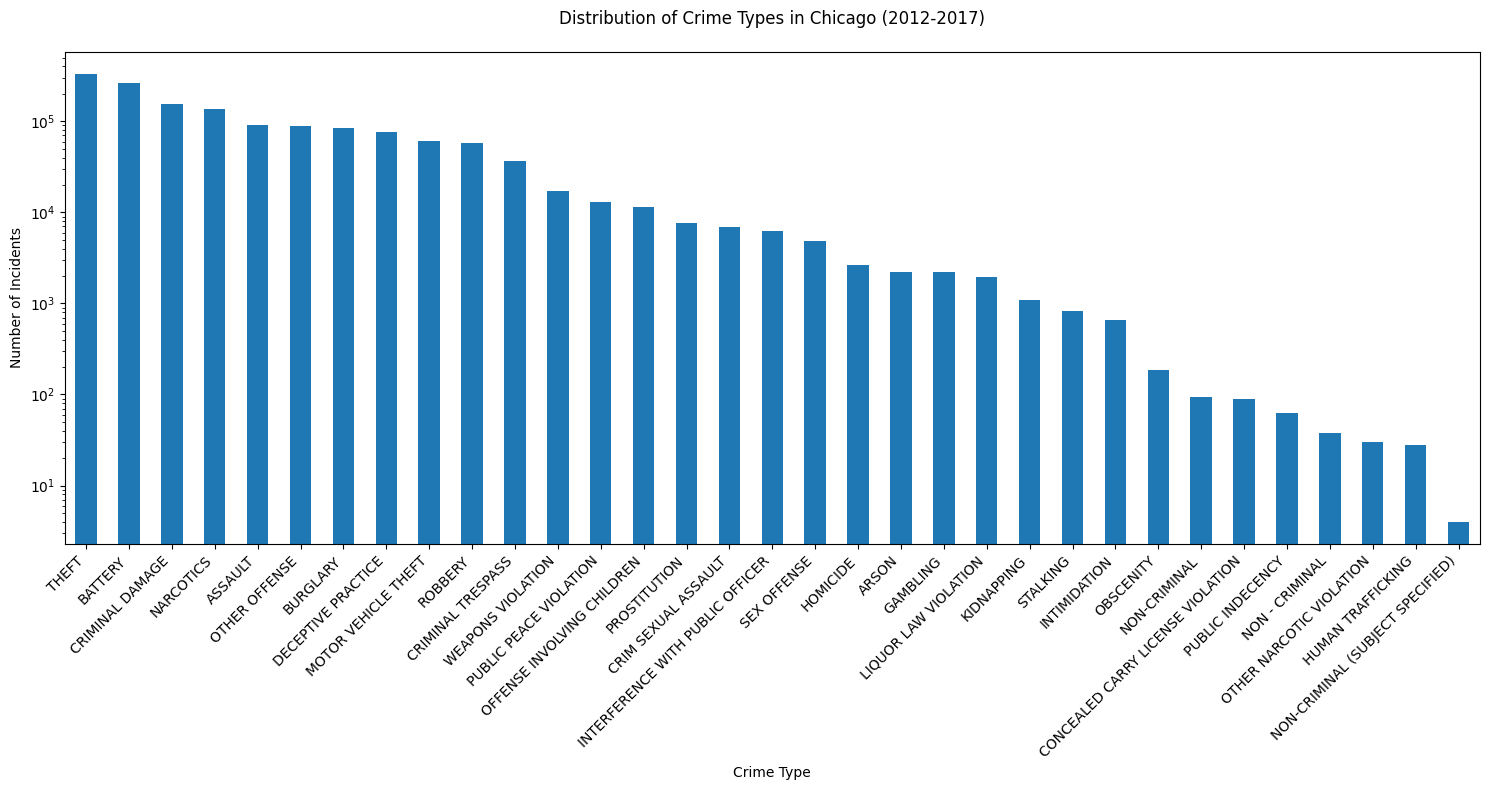


Crime counts by type:
Primary Type
THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1

In [7]:
# show info about IUCR column and Primary Type
# chicago['IUCR'].unique()
chicago['Primary Type'].unique() 


# Visualize the distribution of crime types with better formatting
plt.figure(figsize=(15, 8))  # Increased figure size for better readability

# Create the bar plot
crime_counts = chicago['Primary Type'].value_counts()
# about y-axis, may use log scale
# Use log scale for y-axis to better visualize the distribution
plt.yscale('log')

crime_counts.plot(kind='bar') 


# Customize the plot
plt.title('Distribution of Crime Types in Chicago (2012-2017)', pad=20)
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')

# Rotate x-axis labels and adjust their position
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the rotated labels

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print the actual counts for reference
print("\nCrime counts by type:")
print(crime_counts)


In [8]:
# show crime location distribution on a reral chicago map
import folium
from folium import plugins

# Create a base map centered on Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Create a list of locations from the dataframe
locations = chicago_clean[['Latitude', 'Longitude']].values.tolist()

# Add a heatmap layer with customized parameters
plugins.HeatMap(
    locations,
    min_opacity=0.2,          # Minimum opacity of the heatmap
    max_val=100,              # Maximum point intensity
    radius=15,                # Radius of each point in pixels
    blur=10,                  # Amount of blur
    gradient={                # Custom color gradient
        0.2: '#fee0d2',      # Light pink for low density
        0.4: '#fc9272',      # Medium pink
        0.6: '#de2d26',      # Dark red
        1: '#a50f15'         # Very dark red for high density
    }
).add_to(chicago_map)

# Add a marker cluster layer for individual crime points
marker_cluster = plugins.MarkerCluster().add_to(chicago_map)

# Sample a subset of crimes to avoid overwhelming the map
sample_size = 1000
sampled_crimes = chicago_clean.sample(n=sample_size, random_state=42)

# Add markers for each crime in the sample
for idx, row in sampled_crimes.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Type: {row['Primary Type']}<br>Date: {row['Date']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map 
# chicago_map # uncomment to display the map

/var/folders/m2/zcwxrgy51pn1nvmjxw69mj9h0000gn/T/ipykernel_56824/1344093095.py:12: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  plugins.HeatMap(
